In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a pandas DataFrame

sales_data = {
    'product': ["paint", "pencil", "canvas", "glue", "charcoal"],
    'sales': [52, 116, 43, 15, 0],
    'price': [15, 5, 30, 8, 6]
}

df_sales = pd.DataFrame(sales_data)
df_sales.set_index('product')
print(df_sales)

    product  sales  price
0     paint     52     15
1    pencil    116      5
2    canvas     43     30
3      glue     15      8
4  charcoal      0      6


In [107]:
# Display columns types

df_sales.dtypes

product    object
sales       int64
price       int64
dtype: object

In [108]:
df_sales.describe()

,sales,price
count,5.000000,5.000000
mean,45.200000,12.800000
std,44.773876,10.377861
min,0.000000,5.000000
25%,15.000000,6.000000
50%,43.000000,8.000000
75%,52.000000,15.000000
max,116.000000,30.000000


In [74]:
# Count number of 0 values in a column

zero_sales = df_sales['sales'].eq(0).sum(axis=0)
print(f'Count zero sales: {zero_sales}')

Count zero sales: 1


In [75]:
# Check for duplicates in a column

check_dups = df_sales.duplicated(subset=['product']).any()
print(f'Duplicate products: {check_dups}')

Duplicate products: False


In [109]:
# Calculate the mean, max, min, median of a column in a DataFrame and print formatted output

mean_sales = df_sales['sales'].mean()
max_sales = max(df_sales['sales'])
min_sales = min(df_sales['sales'])
median_sales = df_sales['sales'].median()

print(f'Mean:{mean_sales:.2f} Max:{max_sales} Min:{min_sales} Median:{median_sales}') 

Mean:45.20 Max:116 Min:0 Median:43.0


In [77]:
# Return the values of one column based on a query on another column

max_price = max(df_sales['price'])
max_price_product = df_sales.query('price == @max_price')['product']
print(max_price_product)

2    canvas
Name: product, dtype: object


In [78]:
# Combine two DataFrame columns to create a new column

df_sales['revenue'] = df_sales.sales * df_sales.price
print(df_sales.revenue)

0     780
1     580
2    1290
3     120
4       0
Name: revenue, dtype: int64


Text(0.5, 1.0, 'Revenue by product')

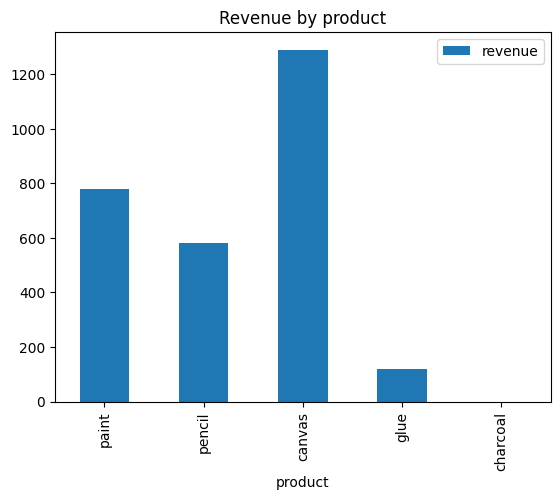

In [79]:
# Plot a bar graph from a DataFrame

ax = df_sales.plot.bar(x='product', y='revenue')
ax.set_title('Revenue by product')

In [80]:
# Define another DataFrame with a matching column to use join

supplier_data = {
    'product': ["paint", "pencil", "canvas", "glue", "charcoal"],
    'supplier': ["Paint Supplier", "Art Supplier", "Paint Supplier", "Art Supplier", "Art Supplier"]
}

df_supplier = pd.DataFrame(supplier_data)
df_supplier.set_index('product')
print(df_supplier)

    product        supplier
0     paint  Paint Supplier
1    pencil    Art Supplier
2    canvas  Paint Supplier
3      glue    Art Supplier
4  charcoal    Art Supplier


In [90]:
# Join pandas DataFrames on index columns and drop the right column

df_join = df_sales.join(df_supplier, how='left', rsuffix='_supplier').drop(['product_supplier'], axis=1)
print(df_join)

    product  sales  price  revenue        supplier
0     paint     52     15      780  Paint Supplier
1    pencil    116      5      580    Art Supplier
2    canvas     43     30     1290  Paint Supplier
3      glue     15      8      120    Art Supplier
4  charcoal      0      6        0    Art Supplier


In [91]:
# Data types of pandas DataFrame columns

df_join.dtypes

product     object
sales        int64
price        int64
revenue      int64
supplier    object
dtype: object

In [95]:
# Filter DataFrame

art_filter = df_join['supplier'] == "Art Supplier"
art_sales = df_join[art_filter]['sales'].sum()
print(art_sales)

131


In [99]:
# Group by and aggregate

df_supplier_revenue = df_join.groupby('supplier')['revenue'].sum()
print(df_supplier_revenue)

supplier
Art Supplier       700
Paint Supplier    2070
Name: revenue, dtype: int64


Text(0.5, 1.0, 'Revenue by Supplier')

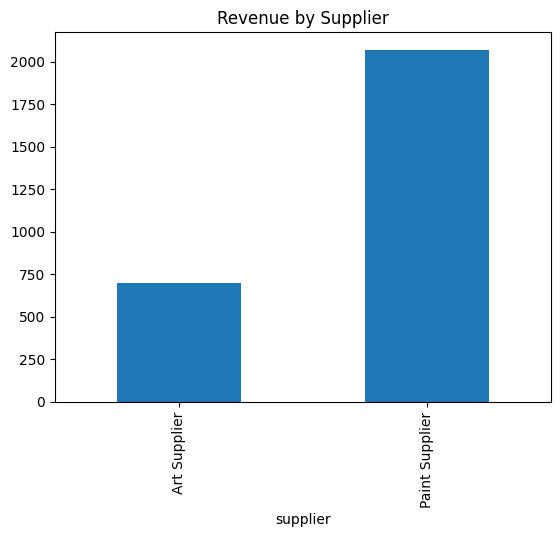

In [102]:
ax = df_supplier_revenue.plot.bar(x='supplier', y='revenue')
ax.set_title('Revenue by Supplier')

In [112]:
# Read from a csv file into a DataFrame

rainfall_df = pd.read_csv("C:/data/rainfall_data_year.csv")
print(rainfall_df)

           Date  Rainfall (cm)
0    2023-01-01           5.74
1    2023-01-02           0.52
2    2023-01-03          19.40
3    2023-01-04           5.53
4    2023-01-05           7.01
..          ...            ...
360  2023-12-27          11.99
361  2023-12-28           7.30
362  2023-12-29           6.03
363  2023-12-30           1.48
364  2023-12-31          14.98

[365 rows x 2 columns]


In [115]:
# Change column names

rainfall_df.rename(columns={'Date': 'date', 'Rainfall (cm)': 'rainfall'}, inplace=True)

In [117]:
# Change data type of a column

rainfall_df['date'] = pd.to_datetime(rainfall_df['date'])

In [118]:
rainfall_df.dtypes

date        datetime64[ns]
rainfall           float64
dtype: object

In [119]:
rainfall_df.describe()

,date,rainfall
count,365,365.000000
mean,2023-07-02 00:00:00,9.938493
min,2023-01-01 00:00:00,0.030000
25%,2023-04-02 00:00:00,4.950000
50%,2023-07-02 00:00:00,10.200000
75%,2023-10-01 00:00:00,14.970000
max,2023-12-31 00:00:00,19.930000
std,NaN,5.831280
